# Classification Results

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm 
import pingouin as pg
import scikit_posthocs as sp
import os

In [59]:
#ChatGPT provided method for extracting data
from tbparse import SummaryReader

relative_path = os.path.curdir

reader = SummaryReader(relative_path + "/cnnweak_['drsbru']_20250515-180608")
df_drsbru_acc = reader.scalars

reader = SummaryReader(relative_path + "/cnnweak_['drsprg', 'drsbru']_20250515-181939")
df_both_acc = reader.scalars
df_both_pr = reader.text

reader = SummaryReader(relative_path + "/cnnweak_['drsprg']_20250515-174725")
df_drsprg_acc = reader.scalars

In [4]:
df_both_acc.head()

,step,tag,value
0,1,3D CNN + NN RADIOMICS acc,0.55
1,2,3D CNN + NN RADIOMICS acc,0.55
2,3,3D CNN + NN RADIOMICS acc,0.25
3,4,3D CNN + NN RADIOMICS acc,0.45
4,5,3D CNN + NN RADIOMICS acc,0.55


In [23]:
#Process data

df_drsprg_acc['tag'] = df_drsprg_acc['tag'].str.replace('acc', '')
df_drsprg_acc['radiomics'] = df_drsprg_acc['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_drsprg_acc['model'] = df_drsprg_acc['tag'].str.replace(r'RADIOMICS|rad', '', regex=True)
df_drsprg_acc['model'] = df_drsprg_acc['model'].str.replace("3D CNN +", "")
df_drsprg_acc['model'] = df_drsprg_acc['model'].str.replace("BASELINE", "2D ResNet18")
df_drsprg_acc['model'] = df_drsprg_acc['model'].str.strip()

#Total highest accuracy
model_order = ["2D ResNet18", "NN", "KNN", "SVM", "ET", "RF", "Ensemble"]

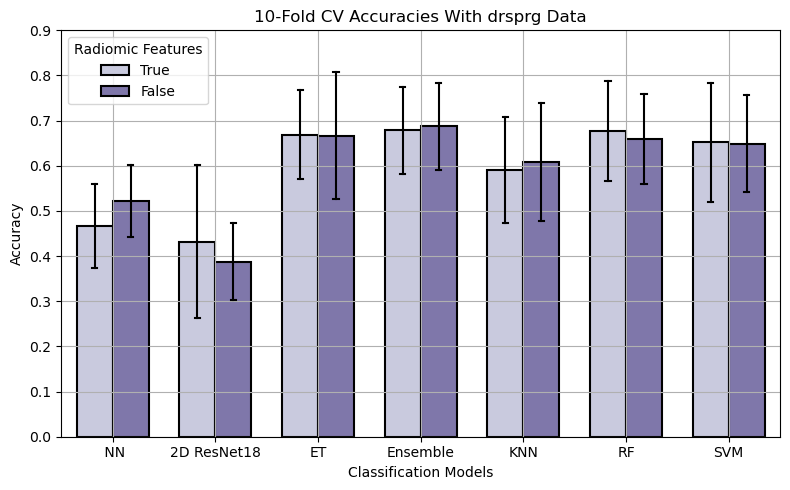

In [24]:
fig = plt.figure(figsize=(8, 5))

# Create the barplot with SD error bars
sns.barplot(
    data=df_drsprg_acc,
    x='model',
    y='value',
    hue='radiomics',
    palette='Purples',
    estimator=np.mean,
    err_kws={"color": "0", "linewidth": 1.5},
    width=0.7,
    errorbar="sd", capsize=.1,
    linewidth=1.5, edgecolor="0",
    order=model_order
)


#plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("10-Fold CV Accuracies With drsprg Data")
plt.legend(title="Radiomic Features")
plt.grid()
plt.ylim(0, 0.9)
plt.tight_layout()
plt.savefig('drsprg_accuracy.pdf', bbox_inches='tight')
plt.show()

# DRSBRU

In [8]:

df_drsbru_acc['tag'] = df_drsbru_acc['tag'].str.replace('acc', '')
df_drsbru_acc['radiomics'] = df_drsbru_acc['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_drsbru_acc['model'] = df_drsbru_acc['tag'].str.replace(r'RADIOMICS|rad', '', regex=True)
df_drsbru_acc['model'] = df_drsbru_acc['model'].str.replace("3D CNN +", "")
df_drsbru_acc['model'] = df_drsbru_acc['model'].str.replace("BASELINE", "2D ResNet18")
df_drsbru_acc['model'] = df_drsbru_acc['model'].str.strip()

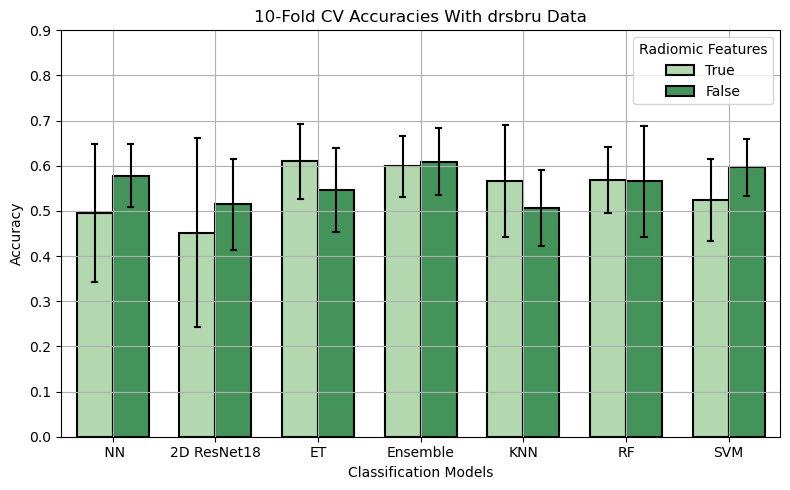

In [9]:
fig = plt.figure(figsize=(8, 5))
# Create the barplot with SD error bars
sns.barplot(
    data=df_drsbru_acc,
    x='model',
    y='value',
    hue='radiomics',
    palette='Greens',
    estimator=np.mean,
    err_kws={"color": "0", "linewidth": 1.5},
    width=0.7,
    errorbar="sd", capsize=.1,
    linewidth=1.5, edgecolor="0",
    order=model_order
)


#plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("10-Fold CV Accuracies With drsbru Data")
plt.legend(title="Radiomic Features")
plt.grid()
plt.ylim(0, 0.9)
plt.tight_layout()
plt.savefig('drsbru_accuracy.pdf', bbox_inches='tight')
plt.show()

# Both

In [10]:
df_both_acc['tag'] = df_both_acc['tag'].str.replace('acc', '')
df_both_acc['radiomics'] = df_both_acc['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_both_acc['model'] = df_both_acc['tag'].str.replace(r'RADIOMICS|rad', '', regex=True)
df_both_acc['model'] = df_both_acc['model'].str.replace("3D CNN +", "")
df_both_acc['model'] = df_both_acc['model'].str.replace("BASELINE", "2D ResNet18").str.strip()
df_both_acc['model'] = df_both_acc['model'].str.strip()
df_both_acc

,step,tag,value,radiomics,model
0,1,3D CNN + NN RADIOMICS,0.55,True,NN
1,2,3D CNN + NN RADIOMICS,0.55,True,NN
2,3,3D CNN + NN RADIOMICS,0.25,True,NN
3,4,3D CNN + NN RADIOMICS,0.45,True,NN
4,5,3D CNN + NN RADIOMICS,0.55,True,NN
...,...,...,...,...,...
135,6,SVM rad,0.60,True,SVM
136,7,SVM rad,0.75,True,SVM
137,8,SVM rad,0.65,True,SVM
138,9,SVM rad,0.70,True,SVM


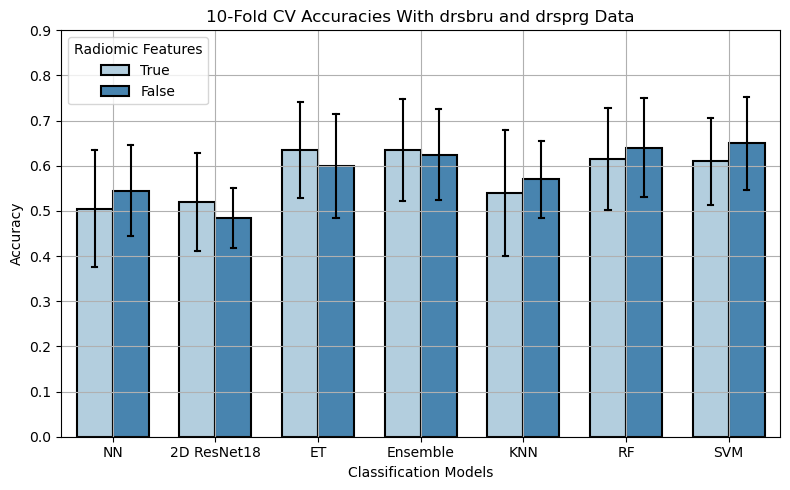

In [11]:
fig = plt.figure(figsize=(8, 5))

# Create the barplot with SD error bars
sns.barplot(
    data=df_both_acc,
    x='model',
    y='value',
    hue='radiomics',
    palette='Blues',
    estimator=np.mean,
    err_kws={"color": "0", "linewidth": 1.5},
    width=0.7,
    errorbar="sd", capsize=.1,
    linewidth=1.5, edgecolor="0",
    order=model_order
)


#plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("10-Fold CV Accuracies With drsbru and drsprg Data")
plt.legend(title="Radiomic Features")
plt.grid()
plt.ylim(0, 0.9)
plt.tight_layout()
plt.savefig('both_accuracy.pdf', bbox_inches='tight')
plt.show()

Violin Plot with both datasets

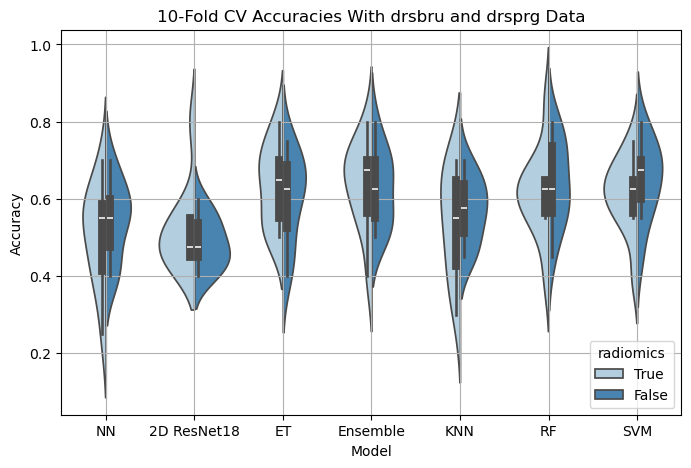

In [12]:
fig = plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df_both_acc,
    palette='Blues',
    x='model',
    y='value',
    hue='radiomics',
    split=True,
    order=model_order
)
plt.title("10-Fold CV Accuracies With drsbru and drsprg Data")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid()
plt.savefig('violin_combined.pdf', bbox_inches='tight')
plt.show()

# Checking for normally distributed data

In [13]:
df_both_stat = df_both_acc[df_both_acc["radiomics"] == "False"].pivot(index="step", columns="model", values="value")
df_both_stat

model,2D ResNet18,ET,Ensemble,KNN,NN,RF,SVM
step,,,,,,,
1,0.55,0.60,0.55,0.55,0.55,0.60,0.70
2,0.45,0.60,0.65,0.60,0.55,0.65,0.70
3,0.45,0.40,0.50,0.50,0.40,0.45,0.45
4,0.55,0.45,0.55,0.45,0.40,0.55,0.55
5,0.50,0.65,0.60,0.70,0.60,0.60,0.60
6,0.45,0.70,0.70,0.65,0.55,0.75,0.65
7,0.40,0.70,0.80,0.55,0.70,0.80,0.80
8,0.50,0.75,0.70,0.60,0.65,0.70,0.70
9,0.60,0.65,0.70,0.65,0.60,0.75,0.75


In [14]:
for model in df_both_stat.loc[:, df_both_stat.columns != "Step"]:
    result = stats.shapiro(df_both_stat[model])
    print(model)
    print(result)

2D ResNet18
ShapiroResult(statistic=0.9318516434981218, pvalue=0.4663504369348168)
ET
ShapiroResult(statistic=0.9299474712184604, pvalue=0.4473756890271864)
Ensemble
ShapiroResult(statistic=0.9247215617484538, pvalue=0.3980210665189836)
KNN
ShapiroResult(statistic=0.9433292947635347, pvalue=0.590618051655978)
NN
ShapiroResult(statistic=0.9283828958278647, pvalue=0.43217606515670076)
RF
ShapiroResult(statistic=0.9615818250171673, pvalue=0.8037491848684387)
SVM
ShapiroResult(statistic=0.962030347399143, pvalue=0.8087538266591255)


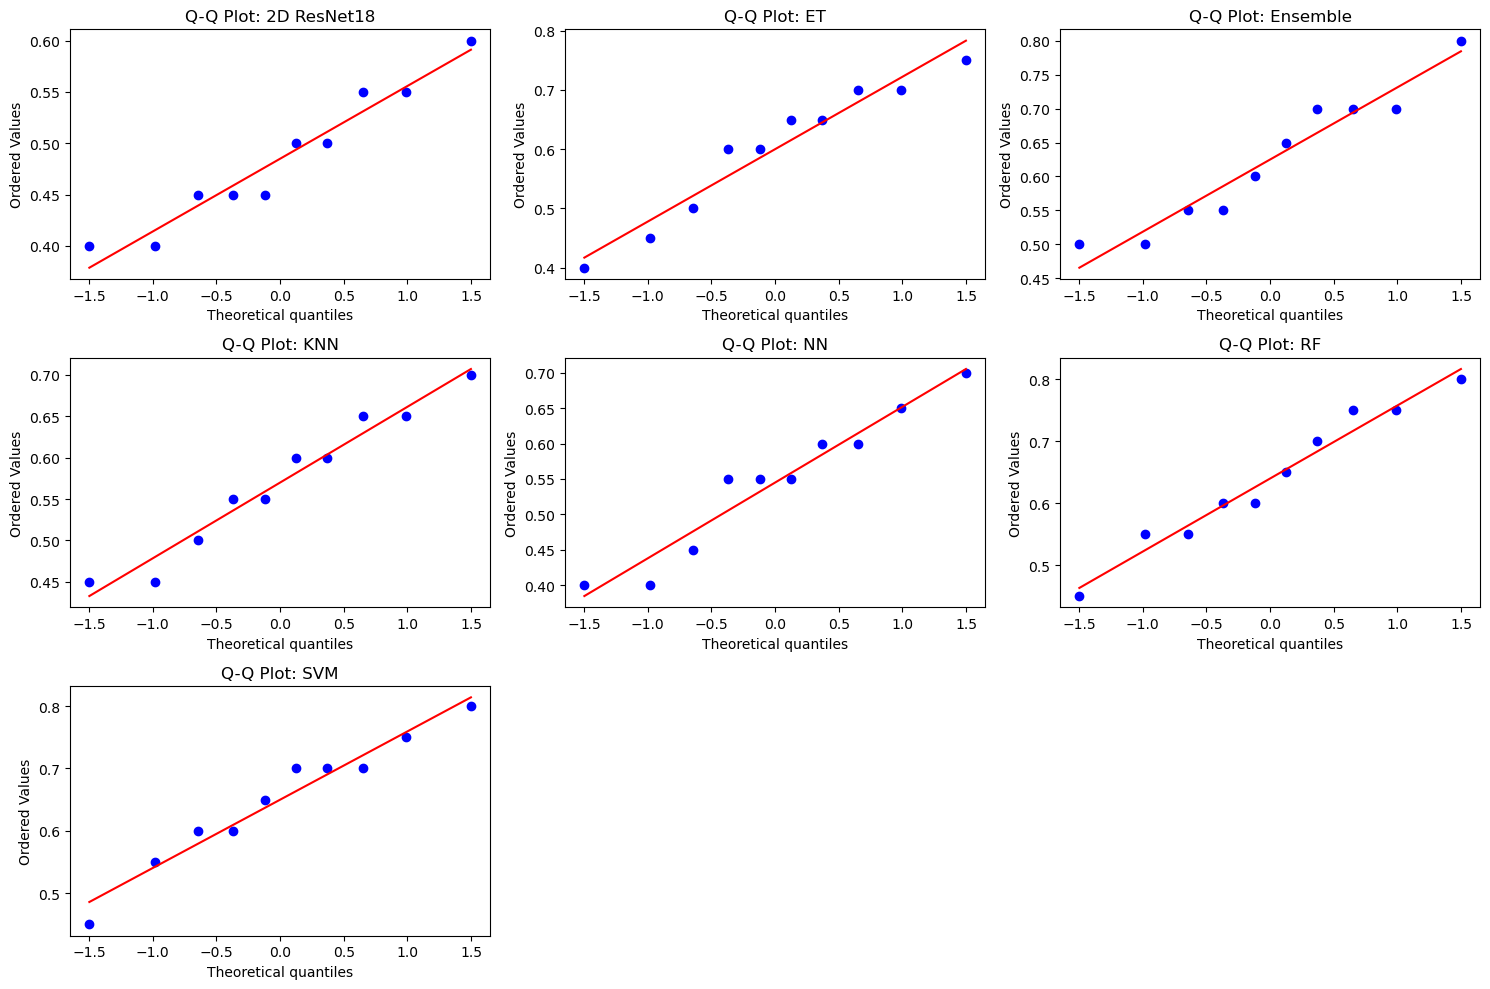

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i in range(7):
        model = df_both_stat.columns[i]
        stats.probplot(df_both_stat[model], dist="norm", plot=axes[i])
        axes[i].set_title(f"Q-Q Plot: {model}")

# Hide unused axes (last two)
for j in range(7, 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('QQ_plot_class.pdf', bbox_inches='tight')

## Friedman

In [16]:
res = stats.friedmanchisquare(df_both_stat["2D ResNet18"], df_both_stat["ET"], df_both_stat["Ensemble"], df_both_stat["KNN"], df_both_stat["NN"], df_both_stat["RF"], df_both_stat["SVM"])
print(res)

FriedmanchisquareResult(statistic=30.0952380952381, pvalue=3.7703046385327696e-05)


### Nemenyi test

In [17]:
sp.posthoc_nemenyi_friedman(df_both_stat)

,2D ResNet18,ET,Ensemble,KNN,NN,RF,SVM
2D ResNet18,1.000000,0.184945,0.031322,0.645473,0.999823,0.005411,0.004462
ET,0.184945,1.000000,0.994057,0.987221,0.370538,0.898068,0.877672
Ensemble,0.031322,0.994057,1.000000,0.774849,0.087853,0.998617,0.997636
KNN,0.645473,0.987221,0.774849,1.000000,0.855064,0.436086,0.402786
NN,0.999823,0.370538,0.087853,0.855064,1.000000,0.019133,0.016128
RF,0.005411,0.898068,0.998617,0.436086,0.019133,1.000000,1.000000
SVM,0.004462,0.877672,0.997636,0.402786,0.016128,1.000000,1.000000


## RM ANOVA

In [18]:
df_both_long = df_both_acc
rm_anova = pg.rm_anova(df_both_long, dv='value', subject='step', within='model', correction=True).round(3)
rm_anova

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,model,6,54,7.897,0.0,0.002,0.219,0.372,True,6.416661e+07,1.0


In [19]:
bonferroni = pg.pairwise_tests(dv='value', within='model', subject='step', padjust='bonf', data=df_both_long)
bonferroni

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,model,2D ResNet18,ET,True,True,-2.746847,9.0,two-sided,0.022593,0.474454,bonf,3.25,-1.219300
1,model,2D ResNet18,Ensemble,True,True,-2.939591,9.0,two-sided,0.016498,0.346452,bonf,4.162,-1.353273
2,model,2D ResNet18,KNN,True,True,-1.328452,9.0,two-sided,0.216727,1.000000,bonf,0.619,-0.550235
3,model,2D ResNet18,NN,True,True,-0.621224,9.0,two-sided,0.549861,1.000000,bonf,0.364,-0.231802
4,model,2D ResNet18,RF,True,True,-2.865603,9.0,two-sided,0.018610,0.390802,bonf,3.785,-1.290643
5,model,2D ResNet18,SVM,True,True,-3.597263,9.0,two-sided,0.005773,0.121232,bonf,9.653,-1.401946
6,model,ET,Ensemble,True,True,-1.341641,9.0,two-sided,0.212580,1.000000,bonf,0.626,-0.114346
7,model,ET,KNN,True,True,2.865603,9.0,two-sided,0.018610,0.390802,bonf,3.785,0.566371
8,model,ET,NN,True,True,5.285714,9.0,two-sided,0.000503,0.010569,bonf,72.6,0.827496
9,model,ET,RF,True,True,-0.768222,9.0,two-sided,0.462036,1.000000,bonf,0.395,-0.089608


# MEAN VALUES - DRSPRG

In [36]:
mean_std_drsprg = df_drsprg_acc.groupby(['radiomics', 'model'])['value'].agg(['mean', 'std']).reset_index()
mean_std_drsprg['mean'] = mean_std_drsprg['mean'].round(2)
mean_std_drsprg['std'] = mean_std_drsprg['std'].round(2)
mean_std_drsprg

,radiomics,model,mean,std
0,False,NN,0.52,0.08
1,False,2D ResNet18,0.39,0.09
2,False,ET,0.67,0.14
3,False,Ensemble,0.69,0.10
4,False,KNN,0.61,0.13
5,False,RF,0.66,0.10
6,False,SVM,0.65,0.11
7,True,NN,0.47,0.09
8,True,2D ResNet18,0.43,0.17
9,True,ET,0.67,0.10


# MEAN VALUES - DRSBRU

In [38]:
mean_std_drsbru = df_drsbru_acc.groupby(['radiomics', 'model'])['value'].agg(['mean', 'std']).reset_index()
mean_std_drsbru['mean'] = mean_std_drsbru['mean'].round(2)
mean_std_drsbru['std'] = mean_std_drsbru['std'].round(2)
mean_std_drsbru

,radiomics,model,mean,std
0,False,NN,0.58,0.07
1,False,2D ResNet18,0.51,0.10
2,False,ET,0.55,0.09
3,False,Ensemble,0.61,0.07
4,False,KNN,0.51,0.08
5,False,RF,0.57,0.12
6,False,SVM,0.60,0.06
7,True,NN,0.50,0.15
8,True,2D ResNet18,0.45,0.21
9,True,ET,0.61,0.08


# MEAN VALUES - COMBINED

In [39]:
mean_std_both = df_both_acc.groupby(['radiomics', 'model'])['value'].agg(['mean', 'std']).reset_index()
mean_std_both['mean'] = mean_std_both['mean'].round(2)
mean_std_both['std'] = mean_std_both['std'].round(2)
mean_std_both

,radiomics,model,mean,std
0,False,2D ResNet18,0.49,0.07
1,False,ET,0.60,0.12
2,False,Ensemble,0.62,0.10
3,False,KNN,0.57,0.09
4,False,NN,0.55,0.10
5,False,RF,0.64,0.11
6,False,SVM,0.65,0.10
7,True,2D ResNet18,0.52,0.11
8,True,ET,0.63,0.11
9,True,Ensemble,0.63,0.11


In [72]:
df_both_acc

,step,tag,value
0,1,3D CNN + NN RADIOMICS acc,0.55
1,2,3D CNN + NN RADIOMICS acc,0.55
2,3,3D CNN + NN RADIOMICS acc,0.25
3,4,3D CNN + NN RADIOMICS acc,0.45
4,5,3D CNN + NN RADIOMICS acc,0.55
...,...,...,...
135,6,SVM acc rad,0.60
136,7,SVM acc rad,0.75
137,8,SVM acc rad,0.65
138,9,SVM acc rad,0.70


In [73]:
df_both_pr['tag'] = df_both_pr['tag'].str.replace('acc', '')
df_both_pr['radiomics'] = df_both_pr['tag'].str.contains(r'RADIOMICS|rad').map({True: 'True', False: 'False'})
df_both_pr['precision'] = df_both_pr['tag'].str.contains(r'precision').map({True: 'True', False: 'False'})
df_both_pr['model'] = df_both_pr['tag'].str.replace(r'RADIOMICS|rad|precision|recall', '', regex=True)
df_both_pr['model'] = df_both_pr['model'].str.replace(r'(B3D CNN \+|3D CNN \+)', '', regex=True)
df_both_pr['model'] = df_both_pr['model'].str.strip()
df_both_pr

,step,tag,value,radiomics,precision,model
0,1,3D CNN + NN RADIOMICS precision,[0.375 0.66666667 0. 1. 1...,True,True,NN
1,2,3D CNN + NN RADIOMICS precision,[1. 0.58333333 0.4 0. 0...,True,True,NN
2,3,3D CNN + NN RADIOMICS precision,[0.25 0.33333333 0. 0. 0...,True,True,NN
3,4,3D CNN + NN RADIOMICS precision,[0.66666667 0.46666667 0. 0. 0...,True,True,NN
4,5,3D CNN + NN RADIOMICS precision,[0.66666667 0.42857143 0.5 1. 0...,True,True,NN
...,...,...,...,...,...,...
279,7,SVM recall rad,[0.6 0.71428571 0.8 1. 1...,True,False,SVM
280,8,SVM recall rad,[0.6 0.85714286 0.4 0.5 1...,True,False,SVM
281,9,SVM recall rad,[0.4 0.71428571 0.8 1. 1...,True,False,SVM
282,10,SVM recall rad,[0.6 0.57142857 0.75 0. 0...,True,False,SVM


In [74]:
models_include = ["Baseline", "Ensemble", "NN", "SVM"]
df_both_filter = df_both_pr[
    (df_both_pr['radiomics'] == 'False') &
    (df_both_pr['model'].isin(models_include))
    ]

In [75]:
df_both_filter

,step,tag,value,radiomics,precision,model
10,1,3D CNN + NN precision,[0.75 0.54545455 0.33333333 0.5 0...,False,True,NN
11,2,3D CNN + NN precision,[0.5 0.55555556 0.33333333 0.66666667 1...,False,True,NN
12,3,3D CNN + NN precision,[0.6 0.28571429 0.28571429 0. 1...,False,True,NN
13,4,3D CNN + NN precision,[0.4 0.41666667 0. 0. 0...,False,True,NN
14,5,3D CNN + NN precision,[0.8 0.55555556 0.5 0. 0...,False,True,NN
...,...,...,...,...,...,...
268,6,SVM recall,[0.6 1. 0.6 0. 0. ],False,False,SVM
269,7,SVM recall,[0.6 0.85714286 0.8 1. 1...,False,False,SVM
270,8,SVM recall,[0.6 1. 0.4 0.5 1. ],False,False,SVM
271,9,SVM recall,[0.6 0.71428571 0.8 1. 1...,False,False,SVM


In [70]:
df_grouped = (
    df_both_filter
    .groupby(['radiomics', 'precision', 'model'])[['1', '2', '3', '4', '5']]
    .mean()
    .round(2)
    .reset_index()
)
df_grouped


,radiomics,precision,model,1,2,3,4,5
0,False,False,Baseline,0.33,0.72,0.38,0.40,0.40
1,False,False,Ensemble,0.55,0.73,0.48,0.60,0.90
2,False,False,NN,0.61,0.58,0.40,0.35,0.80
3,False,False,SVM,0.52,0.80,0.55,0.60,0.80
4,False,True,Baseline,0.40,0.50,0.54,0.25,0.18
5,False,True,Ensemble,0.74,0.56,0.55,0.70,0.85
6,False,True,NN,0.68,0.55,0.41,0.42,0.65
7,False,True,SVM,0.79,0.59,0.67,0.70,0.80
